#  01. Statistical Thinking and Computational Basics



## Getting to know computation

Some very basic concepts to get us started. If you've written code before, hand tight -- we'll get to core complicated things soon. If this is your first encounter with programming, the idea is to give you enough background to be able to follow the major ideas that follow, though there's not enough here to get you to the point where you'll be able to do much on your own.

### Arithmetic and data types

Below is a code cell. The Python interpreter will execute whatever instructions you type into it, as soon as you hit the 'Run' icon (or the `shift-enter` key combination).

#### Integer addition

In [17]:
2+3

5

#### Floating point addition

In [18]:
2+3.0

5.0

Notice that Python is a **weakly typed** language. You don't have to tell the interpreter whether you're using integers for floats or strings or whatever. And it'll often happily convert between types in ways that can be either helpful or infurating, depending on what you expect to happen.

#### Divsion

Note that the old Python **version 2** (not version 3, which we're using) had a quirk with division, where it failed to move between integers and floating point numbers in the way a human would. So, in version 3, you get what you'd expect:

In [7]:
5/2

2.5

But in version 2, you'd get just the integer part, that is, `2`. You can get the old behavior with the `//` (integer division) operator.

In [11]:
5//2

2

#### Booleans

Boolean data types can have one of two values, `True` or `False`. Note that you use two equals signs (`==`) to **compare** entities, whereas you use one equals (`=`) to **assign** a value to a variable.

In [3]:
2==3

False

In [4]:
2==2

True

In [12]:
2=3

SyntaxError: can't assign to literal (<ipython-input-12-0a6d37a048cb>, line 1)

Notice the error above. You can't set one integer equal to a different integer, but you can compare to integers to see if they're equal.

#### Strings

We'll do a fair amount of work with strings. They're a series of characters.

In [13]:
"Hello, world!"

'Hello, world!'

#### Lists

OK, last data type for now. Lists are useful for storing sequential data, because you can address individual members or run through the whole collection. Strings also behave like lists of characters under the hood ...

In [14]:
[3, 2, 7]

[3, 2, 7]

In [16]:
"Hello, world!"[7]

'w'

Notice the notation above. We've selected the list member at index position 7, which is the letter 'w'. If you count the characters, you'll see that 'w' is the eighth character of the string "Hello, world!" Our code returns 'w' because Python, like many programming languages, indexes from zero, not one.

### Variables

You use variables to store values, often the results of calculations. It's good practice to give your variables meaningful names, so that you -- or anyone else reading your code -- can tell at a glance what kinds of data they hold and how they're used in your program.

Here's a very simple example ...

In [19]:
sample = 3
print(sample)

3


In [20]:
sample + 7

10

Note that the value stored in the variable `sample` hasn't changed:

In [21]:
print(sample)

3


If I **want** the value of `sample` to change, I need to assign a different value to it. What's cool is that I can use the current value of `sample` to calculate the new value, even if I don't know what the current value is.

In [22]:
sample = sample * 2
sample = sample + 3
print(sample)

9


You can name variables almost anything, but variable names in Python can't start with a number or a symbol (except for underscore), nor can they be the same as a small set of Python reserved words (such as `False` or `import`). Variable names are also case sensitive, so `sample` and `Sample` have no necessary relation to one another.

If you're coming to Python from another language, you'll have noticed that Python doesn't force (or allow) you to declare your variables. That is, you don't explicitly tell the computer that you're creating a new variable, nor what type of data you're going to store in it. Just using a legal name that doesn't already exist creates the variable, and Python infers the type from the data you assign to it. For example:

In [23]:
an_integer = 2
a_float    = 2.0
monkeys    = ['Alpha', 'Bravo', 'Charlie']

In [30]:
print(type(an_integer))
print(type(a_float))
print(type(monkeys))

<class 'int'>
<class 'float'>
<class 'list'>


You can cast one type to another, provided there's a logical way to do so:

In [35]:
print(a_float)
print(type(a_float))
int_that_used_to_be_a_float = int(a_float)
print(int_that_used_to_be_a_float)
print(type(int_that_used_to_be_a_float))

2.0
<class 'float'>
2
<class 'int'>


But there's no obvious way to turn a list of strings into an integer, so the type cast fails:

In [34]:
int(monkeys)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'

**We can read this error message and learn from it!** It tells us that there was a `TypeError`, so something went wrong having to do with the type of data that we were using. It went wrong in line 1, which contained the code `int(monkeys)`. Specifically, the data that we supplied to the `int()` function was supposed to be a string, a number, or a 'bytes-like object,' not a list (which is what we supplied).

Python errors are generally pretty informative, and while it can be hard to figure out exactly what went wrong in a large program, an error message almost always gives you some useful clues. In any case, explicit errors like this one are a lot easier to debug than are subtler errors where the code runs fine, but gives unexpected results. Or even worse, where the results *seem* fine, but aren't (becuase of an error in your logic, say, or an operation performed on the wrong data).

**NB.** Watch out for implicit, silent type conversions in your code. They often do what you want (such as converting between integers and flaots), but not always. This can be the source of difficult bugs.

### Iteration and flow control

You'll often find yourself needing to run a piece of code a given number of times or for each observation in a data set. A common way to do this is to do this is to use one of two main loop constructs, `for` and `while`.

To print the integers between 1 and 5, we could use a `for` loop:

In [42]:
for i in range(5):
    print(i)

0
1
2
3
4


The biggest thing to note here is that we define the scope of a loop (and many other kinds of functions) in Python using whitespace. Specifically, we indented the functional part of the loop. If we wanted to carry on doing things after the loop finished, we would have written subsequent code below the `print` statement without an indent.

Python's use of meaninful whitespace is unusual among programming languages. It means that your code will often fail or give unexpected results if your indenting is inconsistent. On the plus side, you don't have to search for and count curly brackets nearly as often as you do in other languages.

Note, too, that the `range` function begins by default at zero and **excludes** the supplied end value. FYI, you can supply start, stop, and increment values. To count to 100 (inclusive) by tens, write:

In [45]:
for i in range(0,101,10):
    print(i)

0
10
20
30
40
50
60
70
80
90
100


Let's say we want to add the integers from 1 through 5 ...

In [48]:
result = 0
for number in range(1,6):
    print('\t%s + %s'%(result, number))
    result += number
print('The sum is:', result)

	0 + 1
	1 + 2
	3 + 3
	6 + 4
	10 + 5
The sum is: 15


Handful of things to notice in this one.

* We need to create the `result` variable outside the loop, or it'll be recreated (and reset to zero) with each loop iteration. Creating it outside the loop allows us to store values calculated across all the iterations of the loop.
* We've used a clever print statement with string substitution inside the loop. The two instances of `%s` in the string to print each take one of the variables supplied after the end of that string. The `\t` in the print string creates a tab character to indent the intermediate results so that they're easier to read.
* The `+=` operator is a compact way of writing `variable = variable + ...`. Here, it translates to `result = result + number`.

We can also iterate over the elements of a list:

In [50]:
words = ['The', 'cat', 'in', 'the', 'hat']
sentence = ''
for word in words:
    sentence += word + ' '
print(sentence)

The cat in the hat 


OK, that's nice. But sometimes we don't know exactly what sort of data we'll have or whether we'll need to process all of it. Or, we'll know that different data points should be treated differently. For this, we need flow control.

The single most important flow operator is the `if` statement. Let's say we want to count the number of times the word 'the' occurs in the list of words we just now defined. We can combine a `for` loop with and `if` statement to do it:

In [52]:
count_the = 0
for word in words:
    if word == 'the':
        count_the += 1
print('Occurrences of \'the\':', count_the)

Occurrences of 'the': 1


Shoot, we forgot that string comparisons are case sensitive. Let's use an `or` operator along with out `if` statement:

In [55]:
count_the = 0
for word in words:
    if word == 'the' or word == 'The':
        count_the += 1
print('Occurrences of \'the\':', count_the)

Occurrences of 'the': 2


That's fine for a short example, but it would get cumbersome in a hurry. The `in` statement can help:

In [56]:
count_target = 0
target_words = ['The', 'the']
for word in words:
    if word in target_words:
        count_target += 1
print('Occurrences of target words:', count_target)

Occurrences of target words: 2


Two more quickies. You can nest multiple `if` statements:

In [58]:
# Count the numbers evenly divisible by 5 and by 10

div_by_5 = 0  # Count of numbers evenly divisible by 5
div_by_10 = 0 # Count of numbers evenly divisible by 10
for i in range(0,100):
    if i%5 == 0:       # '%' is the modulo operator
        div_by_5 += 1
        if i%10 == 0:
            div_by_10 += 1
print('Divisible by  5:', div_by_5)
print('Divisible by 10:', div_by_10)

Divisible by  5: 20
Divisible by 10: 10


And you can use if-else-then logic. Let's categorize the words in our Dr. Seuss title ...

In [59]:
determiners = ['The', 'the', 'A', 'a']
animals     = ['cat', 'dog', 'horse']

count_determiners = 0
count_animals = 0
count_other = 0

for word in words:
    if word in determiners:
        count_determiners += 1
    elif word in animals:
        count_animals += 1
    else:
        count_other += 1
print('Determiners:', count_determiners)
print('Animals:', count_animals)
print('Other:', count_other)

Determiners: 2
Animals: 1
Other: 2


### Functions

As you can imagine, we often want to run the analytical process and logic on different data. Our temptation is to do one of two things, neither of which is a good idea:

* Write a single block of code and repeatedly change the suplied data by hand.
* Copy the same code over and over, changing the supplied data in each instance.

The first of those options is undesirable because it's untracable. What data did we use to get that result six iterations ago? What parameters did we use? Nothing in the code as it's saved now can tell us.

The second option is a little better, but it gets messy in a hurry. If you discover an error in the original code, or just want to make a change, you have to change it in every copy and rerun each one.

The solution is to write a **function** that encapsulates your code and gives it stable interface. This allows you to write some processing or analytical code once and use it again and again with new data. If there's a problem with it, you can fix that problem once and benefit from the change everywhere.

Here's a simple function that counts the words in a string of text:

In [63]:
def count_words(text):
    words = text.split()   # Split on whitespace
    wordcount = len(words) # How many items in our list of words?
    return wordcount       # Value to pass back to calling program

In [61]:
# count_words() in action

moby = """Call me Ishmael. Some years ago--never mind how long precisely--having
little or no money in my purse, and nothing particular to interest me on
shore, I thought I would sail about a little and see the watery part of
the world."""

count_words(moby)

41

Nice enough, but no big payoff yet. More data!

In [62]:
jane = """There was no possibility of taking a walk that day.  We had been
wandering, indeed, in the leafless shrubbery an hour in the morning; but
since dinner (Mrs. Reed, when there was no company, dined early) the cold
winter wind had brought with it clouds so sombre, and a rain so
penetrating, that further out-door exercise was now out of the question."""

dark = """The Nellie, a cruising yawl, swung to her anchor without a flutter of
the sails, and was at rest. The flood had made, the wind was nearly
calm, and being bound down the river, the only thing for it was to come
to and wait for the turn of the tide."""

for text in (moby, jane, dark):
    print(count_words(text))

41
62
51


But there's a pseudo-bug in our function. The `.split()` method splits words on whitespace, but not punctuation, which means the count for *Moby-Dick* is wrong. Let's fix it and make the string lower case while we're at it:

In [71]:
def count_words_better(text):
    import string       # import useful string code
    convert_to_space = string.punctuation # characters to convert to spaces
    text_clean = ''     # variable to store the transformed string
    for letter in text: # loop over letters in the string
        if letter in convert_to_space:
            letter = ' '     # replace prescribed characters with space
        text_clean += letter # build clean string
    words = text_clean.split()
    wordcount = len(words)
    return wordcount, text_clean # return both the count and the cleaned string

In [72]:
for text in (moby, jane, dark):
    print(count_words_better(text))

(43, 'Call me Ishmael  Some years ago  never mind how long precisely  having\nlittle or no money in my purse  and nothing particular to interest me on\nshore  I thought I would sail about a little and see the watery part of\nthe world ')
(63, 'There was no possibility of taking a walk that day   We had been\nwandering  indeed  in the leafless shrubbery an hour in the morning  but\nsince dinner  Mrs  Reed  when there was no company  dined early  the cold\nwinter wind had brought with it clouds so sombre  and a rain so\npenetrating  that further out door exercise was now out of the question ')
(51, 'The Nellie  a cruising yawl  swung to her anchor without a flutter of\nthe sails  and was at rest  The flood had made  the wind was nearly\ncalm  and being bound down the river  the only thing for it was to come\nto and wait for the turn of the tide ')


This version of the function is more complicated, but more powerful. It fixes our dash problem by replacing punctuation with spaces and it returns, along with the wordcount, a punctuationless version of the input text. This is important: functions can return anything -- and as many things as -- you want them to. `return` statements are, moreover, the **only** way you should pass information from a function back to the code that called it.

The new function makes use of Python's buit-in `string` package to provide the list of punctuation, which saves us from having to type it ourselves and from accidentally forgetting a mark or two.

If we later decide that converting all punctuation marks to spaces was a bad idea (it probably is), we could modify the function again to do something else and then rerun the rest of our code without needing to make any further changes.

## Brief interlude on statistical thinking

Main points:

* The move to larger scales emphasizes regularities and trends over particlarities and exceptions.
* When data sets grow large, we often don't know what they contain or what the "right" values might be. We can use descriptive statics to learn what we're observing.
* Question your instinctive senses, but also question the numbers. Corpora can be dirty and code can be buggy.
* Ask whether your corpus or dataset reflects the underlying phenomenon of interest. How have collection practicies and biases shaped the data available to you?

## Let's work with some texts

I've assembled a small corpus of 28 novels by British and American authors. Let's load them and see a bit of what they contain. This will also allow us to calculate and visualize some simple statistics.

The texts are in the `../Data/Texts/` directory. The files are named with systematic metadata:

```
A-Cather-Antonia-1918-F.txt
```

Means:

* `A` = American (U.S.) author (`B` for British/U.K.)
* `Cather` = Author last name (here, Willa Cather)
* `Antonia` = Short title (here, _My Antonia_)
* `1918` = Year of first publication
* `F` = Female author (`M` for male)

We can parse these names as we ingest the files to create a metadata table.

In [78]:
import pandas as pd
from nltk.corpus.reader.plaintext import PlaintextCorpusReader

text_dir = '../Data/Texts/'
corpus = PlaintextCorpusReader(text_dir, '.*\.txt')

In [80]:
print(corpus.fileids())

['A-Cather-Antonia-1918-F.txt', 'A-Chesnutt-Marrow-1901-M.txt', 'A-Crane-Maggie-1893-M.txt', 'A-Davis-Life_Iron_mills-1861-F.txt', 'A-Dreiser-Sister_Carrie-1900-M.txt', 'A-Hawthorne-Scarlet_Letter-1850-M.txt', 'A-Howells-Silas_Lapham-1885-M.txt', 'A-James-Golden_Bowl-1904-M.txt', 'A-Jewett-Pointed_Firs-1896-F.txt', 'A-London-Call_Wild-1903-M.txt', 'A-Melville-Moby_Dick-1851-M.txt', 'A-Norris-Pit-1903-M.txt', 'A-Twain-Huck_Finn-1885-M.txt', 'A-Wharton-Age_Innocence-1920-F.txt', 'B-Bronte-Jane_Eyre-1847-F.txt', 'B-Bronte-Wuthering_Heights-1847-F.txt', 'B-Collins-Woman_White-1860-M.txt', 'B-Conrad-Heart_Darkness-1902-M.txt', 'B-Dickens-Bleak_House-1853-M.txt', 'B-Disraeli-Sybil-1845-M.txt', 'B-Eliot-Middlemarch-1869-F.txt', 'B-Gaskell-Cranford-1853-F.txt', 'B-Gissing-Grub_Street-1893-M.txt', 'B-Hardy-Tess-1891-M.txt', 'B-Stevenson-Treasure_Island-1883-M.txt', 'B-Thackeray-Vanity_Fair-1848-M.txt', 'B-Trollope-Live_Now-1875-M.txt', 'B-Wells-Time_Machine-1895-M.txt']


In [196]:
def parse_fileids(fileids):
    '''Takes a list of file names formatted like A-Cather-Antonia-1918-F.txt.
       Returns a pandas dataframe of derived metadata.'''
    import pandas as pd
    meta = {}
    for fileid in fileids:
        file = fileid.strip('.txt') # Get rid of file suffix
        fields = file.split('-') # Split on dashes
        fields[2] = fields[2].replace('_', ' ') # Remove underscore from titles
        fields[3] = int(fields[3])
        meta[fileid] = fields
    metadata = pd.DataFrame.from_dict(meta, orient='index') # Build dataframe
    metadata.columns = ['nation', 'author', 'title', 'pubdate', 'gender'] # Col names
    return metadata.sort_index() # Note we need to sort b/c datframe built from dictionary

In [146]:
books = parse_fileids(corpus.fileids())
books

,nation,author,title,pubdate,gender
A-Cather-Antonia-1918-F.txt,A,Cather,Antonia,1918,F
A-Chesnutt-Marrow-1901-M.txt,A,Chesnutt,Marrow,1901,M
A-Crane-Maggie-1893-M.txt,A,Crane,Maggie,1893,M
A-Davis-Life_Iron_mills-1861-F.txt,A,Davis,Life Iron mills,1861,F
A-Dreiser-Sister_Carrie-1900-M.txt,A,Dreiser,Sister Carrie,1900,M
A-Hawthorne-Scarlet_Letter-1850-M.txt,A,Hawthorne,Scarlet Letter,1850,M
A-Howells-Silas_Lapham-1885-M.txt,A,Howells,Silas Lapham,1885,M
A-James-Golden_Bowl-1904-M.txt,A,James,Golden Bowl,1904,M
A-Jewett-Pointed_Firs-1896-F.txt,A,Jewett,Pointed Firs,1896,F
A-London-Call_Wild-1903-M.txt,A,London,Call Wild,1903,M


So, we now have a data frame. What's in it?

In [147]:
len(books)

28

In [148]:
books['nation'].value_counts()

B    14
A    14
Name: nation, dtype: int64

In [149]:
books['gender'].value_counts()

M    20
F     8
Name: gender, dtype: int64

In [150]:
books.describe()

,pubdate
count,28.000000
mean,1879.678571
std,23.984646
min,1845.000000
25%,1853.000000
50%,1885.000000
75%,1900.250000
max,1920.000000


Progress, but kind of cumbersome. Some of this data would be easier to digest is visual form. So ...

### An interlude for plotting

Plotting in Python is a big topic. There's no handy graphical interface to select ranges of data the way there is in Excel and it can be hard to know where to start. For this reason, many people dump their data as a CSV and use soemthing else (probably Excel or R) to create visualizations.

But Python really isn't that bad, and the advantages of sticking with it for vis are real.

* Keeps workflow in one place, a unified codebase
* Creates repeatable output. No guessing about how a plot was created.
* Makes it easy to create dozens or hundreds of related plots for related data

Here are the truly minimal basics.

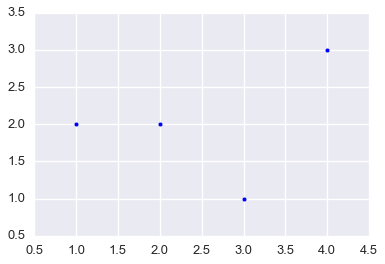

In [155]:
%matplotlib inline
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [2, 2, 1, 3]

plt.scatter(x,y)
plt.show()

This is raw `matplotlib`, the basic plotting library for Python. It's ... OK by default.

We can use it to create other kinds of plots, like a histogram of the publication dates from our corpus:

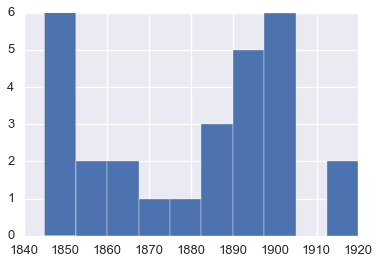

In [156]:
dates = books['pubdate'].tolist() # Convert column to list
plt.hist(dates, 10)
plt.show()

`matplotlib` is nice. Plenty of people use it as-is. But R has fancy statistical graphics built in. Python gets something similar (with added prettiness to boot) via the `seaborn` package, which is also geared to work with Pandas dataframes like the one we just built to hold our `books` data.

#### An example with seaborn

In [167]:
import seaborn as sns
import numpy as np
sns.set()
sns.set_context('talk')

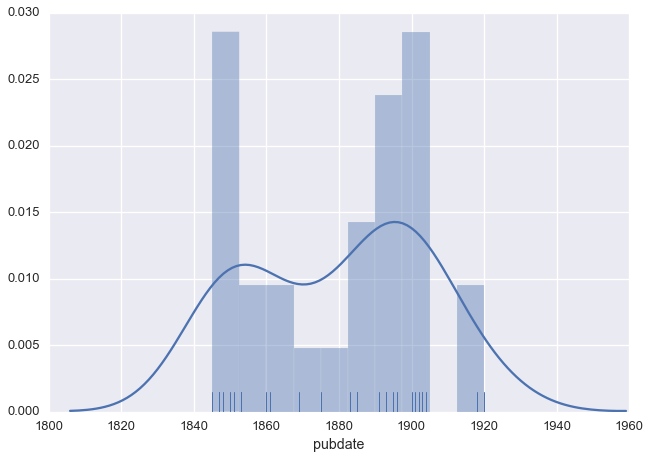

In [168]:
sns.distplot(books['pubdate'], rug=True, kde=True, bins=10)

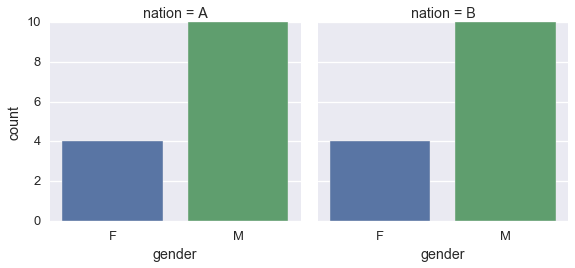

In [178]:
sns.factorplot(x='gender', data=books, col='nation', kind='count')

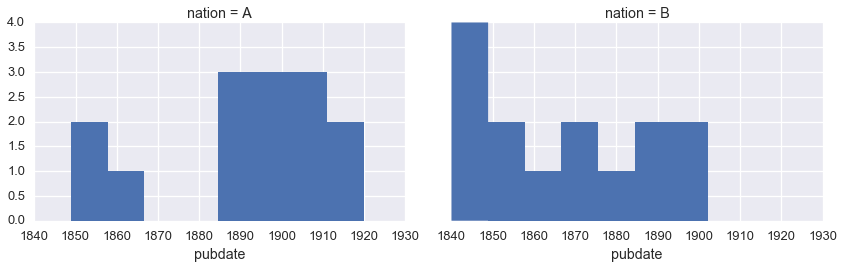

In [185]:
fig = sns.FacetGrid(books, col='nation', margin_titles=True, size=4, aspect=1.5)
bins = np.linspace(1840, 1920, 10)
fig.map(plt.hist, 'pubdate', bins=bins, lw=0)

### Back to our text story

Let's calculate some basic data about our texts. Let's say ... the length in words and the average word length.

We might like to have other data, such as the fraction of words that are nouns or verbs, or the kinds of entities they name, or their general subject matter, all of which could be collected in the same step. But this data can be slow to generate, so we'll skip it for now.

We'll write a function to handle the data collection, then add the output to our existing data frame.

In [212]:
def collect_stats(corpus):
    '''Takes an NLTK corpus as input. 
       Returns a pandas dataframe of stats indexed to fileid.'''
    import nltk
    import pandas as pd
    stats = {}
    for fileid in corpus.fileids():
        word_count = len(corpus.words(fileid))
            # raw character count includes whitespace, so subtract one char per word
        character_count= len(corpus.raw(fileid)) - word_count
        stats[fileid] = {'wordcount':word_count,
                           'word_length':character_count/word_count}
    statistics = pd.DataFrame.from_dict(stats, orient='index')
    return statistics.sort_index()

>**NB.** If we were going to do part-of-speech tagging in pure Python, we'd use NLTK's tagger with a call like this:

> ```
> tagged_text = nltk.pos_tag(corpus.raw(fileid))
> ```

>Then, we'd loop over the results, looking for tags of interest.

In [213]:
stats = collect_stats(corpus)

In [215]:
stats.describe()

,wordcount,word_length
count,28.000000,28.000000
mean,173694.107143,3.619249
std,120711.035414,0.179087
min,18789.000000,3.071520
25%,84780.250000,3.545530
50%,151781.000000,3.625779
75%,235433.000000,3.741530
max,435141.000000,3.933640
